In [1]:
import sys
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\DataModule')
sys.path.insert(0, r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR')
import matplotlib.pyplot as plt
import Data_Preparation
import evaluate 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
import xgboost as xgb

In [2]:
## importing data. 
path=r'C:\Users\buzga\Desktop\School\Reaserch\Langone\ML_RA_EHR\Dataset'
df = Data_Preparation.CoronnaCERTAINDataset(
    library_root=path,
    challenge="two_stage", #option: regression, classification, two_stage
    dataset='CORRONA CERTAIN', 
    process_approach='SC', #option: KVB, SC
    imputation='KNN', #option: SimpleFill, KNN, SoftImpute, BiScaler, NuclearNormMinimization, IterativeImputer, IterativeSVD
    patient_group='bionaive TNF', #option: "all", "bioexp nTNF", "bionaive TNF", "bionaive orencia", "KVB"
    drug_group='all', #option: "all", "actemra", "cimzia", "enbrel", "humira", "orencia", "remicade", "rituxan", "simponi"
    time_points=(0,3), 
    train_test_rate=0.8,
    save_csv=False, 
    random_state=2022)



feature engineering, drop columns due to 70% missing value: Index(['smkyrs', 'numcigs', 'rfstatus_impute', 'ccpstatus_impute',
       'statin_use'],
      dtype='object')
Imputing row 1/1498 with 0 missing, elapsed time: 0.978
Imputing row 101/1498 with 1 missing, elapsed time: 0.978
Imputing row 201/1498 with 0 missing, elapsed time: 0.978
Imputing row 301/1498 with 0 missing, elapsed time: 0.986
Imputing row 401/1498 with 0 missing, elapsed time: 0.986
Imputing row 501/1498 with 1 missing, elapsed time: 0.986
Imputing row 601/1498 with 0 missing, elapsed time: 0.986
Imputing row 701/1498 with 0 missing, elapsed time: 0.986
Imputing row 801/1498 with 0 missing, elapsed time: 0.994
Imputing row 901/1498 with 0 missing, elapsed time: 0.994
Imputing row 1001/1498 with 1 missing, elapsed time: 0.994
Imputing row 1101/1498 with 0 missing, elapsed time: 0.994
Imputing row 1201/1498 with 0 missing, elapsed time: 1.003
Imputing row 1301/1498 with 0 missing, elapsed time: 1.003
Imputing row 14

In [3]:
train, train_loc = df.get_train()
test, test_loc = df.get_test()
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
print("x_train shape is ", X_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", X_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (321, 54)
y_train shape is  (321,)
x_test shape is  (86, 54)
y_test shape is  (86,)


## OLS Regression


In [4]:
ols = linear_model.LinearRegression()
ols.fit(X_train,y_train)
ols_preds=ols.predict(X_test)


## Ridge Regresion

In [5]:
ridge_model = linear_model.RidgeCV()
ridge_model.fit(X_train,y_train)
ridge_preds=ridge_model.predict(X_test)
    

## Lasso Regression

In [6]:
Lasso_model = linear_model.Lasso()
Lasso_model.fit(X_train,y_train)
laso_preds=Lasso_model.predict(X_test)

## Elastic Net

In [7]:
Elastic_net_model = linear_model.ElasticNet()
Elastic_net_model.fit(X_train,y_train)
Elastic_net_preds=Elastic_net_model.predict(X_test)

## Random Forrest

In [8]:
Random_forrest_model=ensemble.RandomForestRegressor()
Random_forrest_model.fit(X_train,y_train)
Random_forrest_predictions=Random_forrest_model.predict(X_test)

## SVM with difrent kernels

In [9]:
svm_model=svm.SVR()
svm_model.fit(X_train,y_train)
svm_preds=svm_model.predict(X_test)

In [10]:
svm_poly_model=svm.SVR(kernel="poly")
svm_poly_model.fit(X_train,y_train)
svm_poly_preds=svm_poly_model.predict(X_test)

In [11]:
svm_sig_model=svm.SVR(kernel="sigmoid")
svm_sig_model.fit(X_train,y_train)
svm_sig_preds=svm_sig_model.predict(X_test)

## XGBoost

In [12]:
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_preds = xgboost.predict(X_test)

## Stacking 

In [13]:
estimators=[('lr',linear_model.RidgeCV()),('svr', svm.SVR()),("rf", ensemble.RandomForestRegressor())  ]
stracking_model = ensemble.StackingRegressor(estimators =estimators,final_estimator =linear_model.RidgeCV())    
stracking_model.fit(X_train,y_train)
stacking_model_preds=stracking_model.predict(X_test)

## accuracy

In [14]:
aml = evaluate.AutoBuild(seed=1, project_name="EHR_RA_SC")
baseline = test['DAS28_CRP_0M']
true = test['DAS28_CRP_3M']
aml.evaluate("OLS Model", baseline, true, ols_preds)
aml.evaluate("Ridge Linear Model", baseline, true, ridge_preds)
aml.evaluate("Lasso Linear Model", baseline, true, laso_preds)
aml.evaluate("Elastic Nets", baseline, true, Elastic_net_preds)
aml.evaluate("SVM RBF", baseline, true, svm_preds)
aml.evaluate("SVM POLY", baseline, true, svm_poly_preds)
aml.evaluate("SVM sigmoid", baseline, true, svm_sig_preds)
aml.evaluate("Random Forrest Regresion", baseline, true, Random_forrest_predictions)
aml.evaluate("XGBoost Regression", baseline, true, xgboost_preds)
aml.evaluate("Stacking Regression", baseline, true, stacking_model_preds)
regression, classification = aml.leaderboard()

In [15]:
regression

,model,MAE,MSE,RMSE,R2,Pearson_Correlation
0,OLS Model,1.037648,1.643516,1.281997,0.165207,0.450617
1,Ridge Linear Model,1.022609,1.580530,1.257191,0.197199,0.473213
2,Lasso Linear Model,1.075564,1.707964,1.306891,0.132471,0.383525
3,Elastic Nets,1.070380,1.679601,1.295994,0.146878,0.401157
4,SVM RBF,1.142082,1.884675,1.372835,0.042714,0.409723
5,SVM POLY,1.164561,1.954299,1.397962,0.007350,0.219164
6,SVM sigmoid,1.831095,7.120923,2.668506,-2.616942,-0.066021
7,Random Forrest Regresion,0.992734,1.443958,1.201648,0.266568,0.577106
8,XGBoost Regression,1.026149,1.596995,1.263723,0.188836,0.483459
9,Stacking Regression,0.989807,1.447329,1.203050,0.264856,0.566491


In [16]:
classification

,model,Accuracy,F1-Score
0,OLS Model,0.441860,0.428713
1,Ridge Linear Model,0.453488,0.435112
2,Lasso Linear Model,0.418605,0.364713
3,Elastic Nets,0.418605,0.377950
4,SVM RBF,0.418605,0.376575
5,SVM POLY,0.430233,0.375960
6,SVM sigmoid,0.372093,0.365300
7,Random Forrest Regresion,0.465116,0.406564
8,XGBoost Regression,0.500000,0.483607
9,Stacking Regression,0.418605,0.374313


In [17]:
aml.confusion_matrix("Random Forrest Regresion")

,Good,Moderate,No Response
Good,12,16,2
Moderate,5,25,1
No Response,4,18,3


In [18]:
aml.confusion_matrix("XGBoost Regression")

,Good,Moderate,No Response
Good,13,14,3
Moderate,6,22,3
No Response,4,13,8


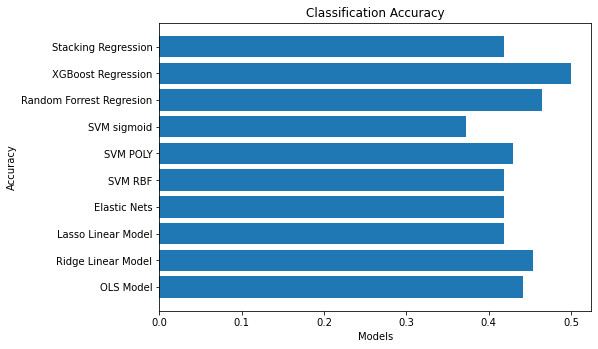

In [19]:
aml.plot_results('classification')